# Projekt M7222
Michal Červenka, Aneta Minibergerová, Kateřina Válková

##Načtení dat a knihoven

In [1]:
if(!require(lmtest)){
  install.packages("lmtest")
}
if(!require(pscl)){
  install.packages("pscl")
}
if(!require(DHARMa)){
  install.packages("DHARMa")
}
if(!require(caret)){
  install.packages('caret')
}
if(!require(MASS)){
  install.packages("MASS")
}
if(!require(performance)){
  install.packages("performance")
}

library(performance) |> suppressPackageStartupMessages() |> suppressWarnings()
library(MASS)|> suppressPackageStartupMessages() |> suppressWarnings()
library(readr) |> suppressPackageStartupMessages() |> suppressWarnings()
library(tidyr) |> suppressPackageStartupMessages() |> suppressWarnings()
library(dplyr) |> suppressPackageStartupMessages() |> suppressWarnings()
library(ggplot2) |> suppressPackageStartupMessages() |> suppressWarnings()
library(lmtest) |> suppressPackageStartupMessages() |> suppressWarnings()
library(pscl)|> suppressPackageStartupMessages() |> suppressWarnings()
library(DHARMa)|> suppressPackageStartupMessages() |> suppressWarnings()
library(caret)|> suppressPackageStartupMessages() |> suppressWarnings()
data <- read_csv("train.csv")

Loading required package: lmtest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lmtest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: pscl

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pscl’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: DHARMa

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DHARMa’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’, ‘rbibutils’, ‘foreach’, ‘iterators’, ‘gap.datasets’, ‘plotly’, ‘Rdpack’, ‘plyr’, ‘doParallel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘gap’,

## Číštění dat


In [2]:
str(data)

spc_tbl_ [18,249 × 37] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ encounter_id            : num [1:18249] 1.88e+08 1.60e+08 2.41e+08 1.85e+08 2.10e+08 ...
 $ patient_nbr             : num [1:18249] 1.02e+08 1.06e+08 4.76e+07 5.51e+07 5.13e+07 ...
 $ race                    : chr [1:18249] "Caucasian" "Caucasian" "AfricanAmerican" "Caucasian" ...
 $ gender                  : chr [1:18249] "Female" "Female" "Male" "Female" ...
 $ age                     : chr [1:18249] "[80-90)" "[80-90)" "[60-70)" "[50-60)" ...
 $ weight                  : chr [1:18249] "?" "?" "?" "?" ...
 $ time_in_hospital        : num [1:18249] 3 3 6 1 3 1 7 6 3 6 ...
 $ num_lab_procedures      : num [1:18249] 53 68 1 70 34 57 42 48 63 30 ...
 $ num_procedures          : num [1:18249] 0 1 0 3 0 0 3 0 1 3 ...
 $ num_medications         : num [1:18249] 13 18 6 11 20 4 34 17 14 19 ...
 $ number_emergency        : num [1:18249] 0 1 0 1 2 0 3 0 0 0 ...
 $ number_diagnoses        : num [1:18249] 7 9 7 9 9 5 9 9 9 8 ...
 $

### NA hodnoty a duplicity

In [3]:
sum(is.na(data))
colSums(is.na(data))
236 / sum(is.na(data))
sum(is.na(data)) / nrow(data)
sum(duplicated(data))

[1] 342

encounter_id              patient_nbr                     race 
                       0                        0                        0 
                  gender                      age                   weight 
                       0                        0                        0 
        time_in_hospital       num_lab_procedures           num_procedures 
                       7                        8                        0 
         num_medications         number_emergency         number_diagnoses 
                       0                        0                        0 
               metformin              repaglinide              nateglinide 
                       0                        0                        0 
          chlorpropamide              glimepiride            acetohexamide 
                       0                        0                        0 
               glipizide                glyburide              tolbutamide 
                      13                        0                        0 
            pioglitazone            rosiglitazone                 acarbose 
                       0                        0                        0 
                miglitol             troglitazone               tolazamide 
                     236                        0                        0 
                 examide              citoglipton                  insulin 
                       0                        0                        0 
     glyburide.metformin      glipizide.metformin glimepiride.pioglitazone 
                       0                        0                       78 
 metformin.rosiglitazone   metformin.pioglitazone                   change 
                       0                        0                        0 
             diabetesMed 
                       0

[1] 0.6900585

[1] 0.01874075

[1] 0

 Dataset obsahuje 342 NA hodnot, což je zanedbatelné v poměru k velikosti datasetu (< 2%). Stojí však za povšimnutí, že 69% NA hodnot pochází z proměnné *miglitol*. K jejich promazání se dostaneme později.

Odstraníme nepodstatné proměnné pro naše
účely, a to  *encounter_id* a *patient_nbr*.

In [4]:
data <- data |> select(-c("encounter_id", "patient_nbr"))

Nyní se důkladněji podíváme na hodonty, které nabávají ostatní proměnné.

In [5]:
lapply(data, unique)

$race
[1] "Caucasian"       "AfricanAmerican" "?"               "Other"          
[5] "Hispanic"        "Asian"          

$gender
[1] "Female" "Male"   "M"      "male"  

$age
 [1] "[80-90)"  "[60-70)"  "[50-60)"  "[70-80)"  "[20-30)"  "[40-50)" 
 [7] "[30-40)"  "[10-20)"  "[90-100)" "[0-10)"  

$weight
 [1] "?"         "[100-125)" "[75-100)"  "[50-75)"   "[125-150)" "[0-25)"   
 [7] "[25-50)"   "[175-200)" ">200"      "[150-175)"

$time_in_hospital
 [1]    3    6    1    7    8    2    4   13    5   10   11    9   14   12   NA
[16] 9999

$num_lab_procedures
  [1]  53  68   1  70  34  57  42  48  63  30  43   9  85  54  23  16  18  65
 [19]  49  46  62  29  71  50   2  22  40  44  25  61  52  19   8  21  58  37
 [37]  20  35  84  73  39  17  51   4  38  24  41  59  72  79   3  77  98  78
 [55]  26  NA  47  75  33  64  69  66  56  31  36  74  11   7  45  10  55  60
 [73]  14  32  12  28  67  80  83   6  96  82  76  13  27  15  87 101  92  95
 [91]  90  91  93   5  99  81  86  89 108 129  94 100  88 104  97 105 114 102
[109] 103 132

$num_procedures
[1] 0 1 3 6 2 5 4

$num_medications
 [1] 13 18  6 11 20  4 34 17 14 19  8 15  5 68 10 26  2 28 23 24 22 25  7 16 21
[26] 46 36 45 41 12 30 27 66  9 44 29 35 33 39 37 32  3 58 38 42 65  1 43 31 50
[51] 40 47 55 49 48 64 52 60 67 54 51 63 56 53 57 61 62 72

$number_emergency
 [1]  0  1  2  3  4  5  8  6 11 10 16 18  7  9 20 13 22 54 63 14 76 15 21 12 28
[26] 19

$number_diagnoses
 [1]    7    9    5    8    6    4    2    3    1   16   15   10 -999   11   14

$metformin
[1] "No"     "Steady" "Down"   "Up"    

$repaglinide
[1] "No"     "Steady" "Down"   "Up"    

$nateglinide
[1] "No"     "Up"     "Steady" "Down"  

$chlorpropamide
[1] "No"     "Steady" "Up"    

$glimepiride
[1] "Steady" "No"     "Up"     "Down"  

$acetohexamide
[1] "No"

$glipizide
[1] "No"     NA       "Steady" "Up"     "Down"  

$glyburide
[1] "No"     "Steady" "Up"     "Down"  

$tolbutamide
[1] "No"     "Steady"

$pioglitazone
[1] "No"     "Steady" "Down"   "Up"    

$rosiglitazone
[1] "No"     "Steady" "Up"     "Down"  

$acarbose
[1] "No"     "Steady" "NO"     "Up"     "no"     "Down"  

$miglitol
[1] "No"     NA       "Steady" "Down"   "Up"    

$troglitazone
[1] "No"

$tolazamide
[1] "No"     "Steady"

$examide
[1] "No"

$citoglipton
[1] "No"

$insulin
[1] "No"     "Steady" "Down"   "Up"    

$glyburide.metformin
[1] "No"     "Steady" "Up"    

$glipizide.metformin
[1] "No"

$glimepiride.pioglitazone
[1] "No" NA  

$metformin.rosiglitazone
[1] "No"     "Steady"

$metformin.pioglitazone
[1] "No"

$change
[1] "No" "Ch" "CH" "no"

$diabetesMed
[1] "Yes" "No"  "yes" "Y"

Vidíme, že musíme upravit hodnoty u proměnných *race*, *gender*, *weight*, *time_in_hospital*, *number_diagnoses* a *acarbose*. Zajímavým pozorováním je také fakt, že léčiva *acetohexamide*, *troglitazone*, *examide*, *citoglipton*, *glipizide.metformin*,*glimepiride.pioglitazone*, *metformin.pioglitazone* nikdo z tázaných pacientů nebere. Proto je můžeme z datasetu vymazat.

In [6]:
data <- data |> select(-c("acetohexamide", "troglitazone", "examide", "citoglipton", "glipizide.metformin","glimepiride.pioglitazone", "metformin.pioglitazone"))

### Race

In [7]:
data$race |> table()
data$race[data$race == '?'] <- NA


              ? AfricanAmerican           Asian       Caucasian        Hispanic 
            383            3552             105           13574             372 
          Other 
            263 

### Gender

In [8]:
data$gender[data$gender == "male"] <- "Male"
data$gender[data$gender == "M"] <- "Male"

### Weight

In [9]:
data$weight |> table()
data$weight[data$weight == "?"] <- NA
sum(is.na(data$weight)) / nrow(data)
data <- data |> select(-weight)


        ?    [0-25) [100-125) [125-150) [150-175) [175-200)   [25-50)   [50-75) 
    17627         5       119        27         5         2        14       189 
 [75-100)      >200 
      260         1 

[1] 0.9659159

Přes 96% záznamů proměnné weight jsou neznáme hodnoty, proměnnou jsme tedy nemá cenu používat.

### Time_in_hospital

In [10]:
data$time_in_hospital |> table()
data$time_in_hospital[data$time_in_hospital == 9999] <- NA


   1    2    3    4    5    6    7    8    9   10   11   12   13   14 9999 
2510 3173 3175 2479 1780 1277 1097  801  551  411  319  256  232  180    1 

### number_diagnoses

In [11]:
 data$number_diagnoses |> table()
data$number_diagnoses[data$number_diagnoses == -999] <- NA


-999    1    2    3    4    5    6    7    8    9   10   11   14   15   16 
   3   31  186  479  981 1908 1648 1848 1915 9232    4    1    3    1    9 

### Change

In [12]:
data$change |> unique()
data$change[data$change == "no"] <- "No"
data$change[data$change == "Ch"] <- "CH"

[1] "No" "Ch" "CH" "no"

### diabetesMed

In [13]:
data$diabetesMed |> unique()
data$diabetesMed[data$diabetesMed == "yes"] <- "Yes"
data$diabetesMed[data$diabetesMed == "Y"] <- "Yes"

[1] "Yes" "No"  "yes" "Y"

### acarbose


In [14]:
data$acarbose |> unique()
data$acarbose[data$acarbose == "no"] <- "No"
data$acarbose[data$acarbose == "NO"] <- "No"

[1] "No"     "Steady" "NO"     "Up"     "no"     "Down"

### Data drop

Počet řádků obsahující NA hodnoty

In [15]:
sum(rowSums(is.na(data)) > 0) / nrow(data)

[1] 0.035454

I po transformaci nonsensikálních hodnot na NA buňky tvoří řádky obsahující NA hodnoty pouze 3.5 % všech záznamů. Proto je můžeme z datasetu vymazat.  

In [16]:
data <- na.omit(data)

### Faktorizace

In [17]:
 data <- data|>
  mutate(across(c('race','gender','age','metformin','repaglinide','nateglinide','chlorpropamide',
                  'glimepiride','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose',
                  'miglitol','tolazamide','insulin','glyburide.metformin','metformin.rosiglitazone','change','diabetesMed'), as.factor))


Poznámka k proměnné *number_diagnoses* - její rozložení napovídá nějakému námi neznámemu omezení pro více jak 9 diagnóz. Vzhledem k zastoupení by byla možná následující transformace

In [18]:
data$number_diagnoses|> table()
data$number_diagnoses[data$number_diagnoses > 9] = 9
data$number_diagnoses <- data$number_diagnoses |> as.factor()
levels(data$number_diagnoses) <- c('1','2','3','4','5','6','7','8','9+')


   1    2    3    4    5    6    7    8    9   10   11   14   15   16 
  31  173  466  950 1759 1588 1794 1863 8960    4    1    3    1    9 

In [19]:
lapply(data, unique)
data <- data |> select(-metformin.rosiglitazone)

$race
[1] Caucasian       AfricanAmerican Other           Hispanic       
[5] Asian          
Levels: AfricanAmerican Asian Caucasian Hispanic Other

$gender
[1] Female Male  
Levels: Female Male

$age
 [1] [80-90)  [60-70)  [50-60)  [70-80)  [20-30)  [40-50)  [30-40)  [10-20) 
 [9] [90-100) [0-10)  
10 Levels: [0-10) [10-20) [20-30) [30-40) [40-50) [50-60) [60-70) ... [90-100)

$time_in_hospital
 [1]  3  6  1  7  2  4 13  5  8 11  9 10 14 12

$num_lab_procedures
  [1]  53   1  70  57  42  48  63  30   9  85  54  23  16  18  65  46  62  29
 [19]  71  50   2  22  40  44  68  52  61  43  19   8  49  58  37  34  20  35
 [37]  84  21  73  39  17  51   4  38  24  59  79   3  77  25  98  78  26  47
 [55]  41  33  64  69  66  31  56  36  74   7  45  10  55  60  14  32  12  67
 [73]  80  83  82  76  13  11  28  72  27  15  87  96 101  75  92  95  90   6
 [91]  93   5  99  81  86  89 108 129  94 100  91  88 104  97 105 114 102 103
[109] 132

$num_procedures
[1] 0 3 1 6 2 5 4

$num_medications
 [1] 13  6 11  4 34 17 14 19 15  5 68 10 26  8  2 28 24 18 22 25 20  7 16 46 36
[26] 45 41 12 21 30 27 66  9 29 23 33 37 32  3 35 58 38 39 42 65  1 31 43 40 44
[51] 47 55 49 48 64 52 60 67 54 50 51 63 56 53 57 61 62 72

$number_emergency
 [1]  0  1  3  2  4  5  8 11 10  6 16  7  9 20 13 22 54 63 14 76 18 15 21 12 28
[26] 19

$number_diagnoses
[1] 7  9+ 5  8  6  4  2  3  1 
Levels: 1 2 3 4 5 6 7 8 9+

$metformin
[1] No     Steady Down   Up    
Levels: Down No Steady Up

$repaglinide
[1] No     Steady Down   Up    
Levels: Down No Steady Up

$nateglinide
[1] No     Steady Up     Down  
Levels: Down No Steady Up

$chlorpropamide
[1] No     Steady Up    
Levels: No Steady Up

$glimepiride
[1] Steady No     Up     Down  
Levels: Down No Steady Up

$glipizide
[1] No     Steady Up     Down  
Levels: Down No Steady Up

$glyburide
[1] No     Steady Up     Down  
Levels: Down No Steady Up

$tolbutamide
[1] No     Steady
Levels: No Steady

$pioglitazone
[1] No     Steady Down   Up    
Levels: Down No Steady Up

$rosiglitazone
[1] No     Steady Up     Down  
Levels: Down No Steady Up

$acarbose
[1] No     Steady Up     Down  
Levels: Down No Steady Up

$miglitol
[1] No     Steady Down   Up    
Levels: Down No Steady Up

$tolazamide
[1] No     Steady
Levels: No Steady

$insulin
[1] No     Steady Up     Down  
Levels: Down No Steady Up

$glyburide.metformin
[1] No     Steady
Levels: No Steady

$metformin.rosiglitazone
[1] No
Levels: No

$change
[1] No CH
Levels: CH No

$diabetesMed
[1] Yes No 
Levels: No Yes

## Sestavení modelů

### Exploratorní analýza odezvy

In [20]:
emerg_cut <- data$number_emergency
emerg_cut[emerg_cut > 15] <- 15
emerg_cut |> table()

emerg_cut
    0     1     2     3     4     5     6     7     8     9    10    11    12 
13065  3068   807   302   144    78    31    23    23    11    15    11     2 
   13    14    15 
    5     2    15 

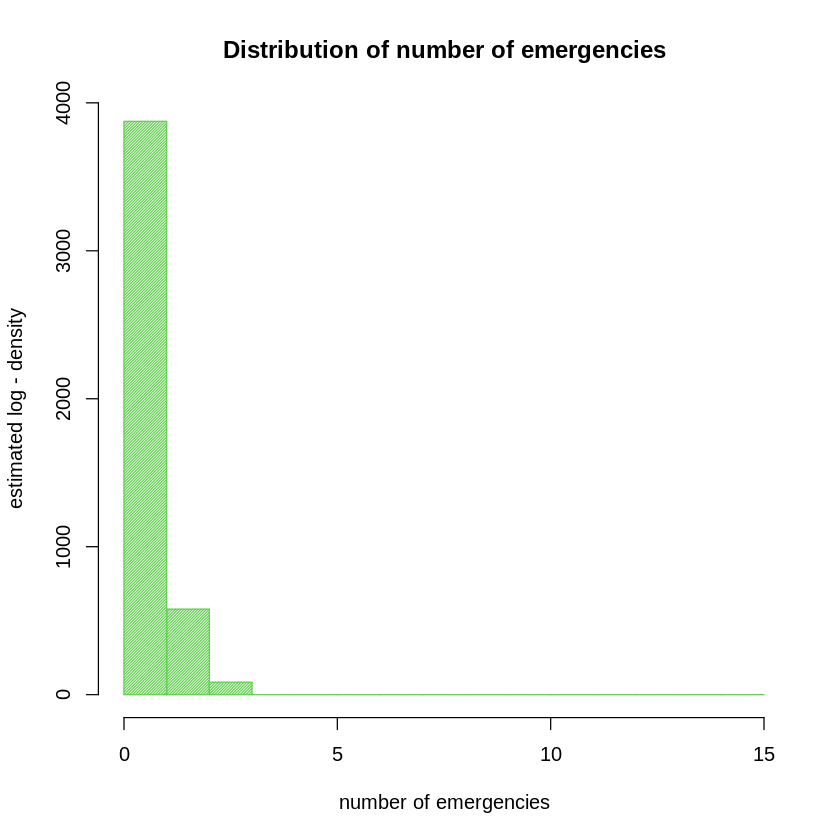

In [21]:
hist(log(emerg_cut),
     col = 3,
     density = 60,
     xlab = "number of emergencies",
     prob = F,
     ylab = "estimated log - density",
     main = "Distribution of number of emergencies",
     breaks = 0:15)

### Poisson


#### Sestavení modelu

In [22]:
model.pois.full <- glm(number_emergency ~ ., data = data, family = poisson(link = "log"))
summary(model.pois.full)


Call:
glm(formula = number_emergency ~ ., family = poisson(link = "log"), 
    data = data)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -4.261e+01  8.716e+02  -0.049 0.961005    
raceAsian                 -7.785e-01  2.251e-01  -3.459 0.000543 ***
raceCaucasian             -1.157e-01  2.732e-02  -4.234 2.29e-05 ***
raceHispanic              -2.231e-01  8.066e-02  -2.767 0.005664 ** 
raceOther                  1.912e-01  7.863e-02   2.431 0.015037 *  
genderMale                -1.624e-01  2.317e-02  -7.011 2.37e-12 ***
age[10-20)                 1.920e-01  4.797e-01   0.400 0.689016    
age[20-30)                 1.208e+00  4.536e-01   2.664 0.007732 ** 
age[30-40)                 7.979e-01  4.532e-01   1.761 0.078311 .  
age[40-50)                 6.989e-01  4.526e-01   1.544 0.122542    
age[50-60)                 2.564e-01  4.526e-01   0.567 0.571030    
age[60-70)                -8.742e-02  4.528e-01  -0.193 0.846887

#### Overdisperze


Zkontrolujeme, jestli nedošlo k overdisperzi

In [23]:
performance::check_overdispersion(model.pois.full)

Overdispersion detected.



# Overdispersion test

       dispersion ratio =     3.462
  Pearson's Chi-Squared = 60703.651
                p-value =   < 0.001


Vidíme, že došlo k overdisperzi a budeme tedy pracovat quasipoissonem

In [24]:
model.pois.full.quasi <- glm(number_emergency ~ ., data = data, family = quasipoisson(link = "log"))
summary(model.pois.full.quasi)


Call:
glm(formula = number_emergency ~ ., family = quasipoisson(link = "log"), 
    data = data)

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -4.261e+01  1.622e+03  -0.026 0.979036    
raceAsian                 -7.785e-01  4.188e-01  -1.859 0.063058 .  
raceCaucasian             -1.157e-01  5.083e-02  -2.276 0.022875 *  
raceHispanic              -2.231e-01  1.501e-01  -1.487 0.137048    
raceOther                  1.912e-01  1.463e-01   1.307 0.191290    
genderMale                -1.624e-01  4.310e-02  -3.768 0.000165 ***
age[10-20)                 1.920e-01  8.925e-01   0.215 0.829703    
age[20-30)                 1.208e+00  8.440e-01   1.432 0.152293    
age[30-40)                 7.979e-01  8.433e-01   0.946 0.344042    
age[40-50)                 6.989e-01  8.421e-01   0.830 0.406584    
age[50-60)                 2.564e-01  8.422e-01   0.304 0.760758    
age[60-70)                -8.742e-02  8.424e-01  -0.104 0.9

#### Redukce prediktorů

Vytvoříme menší model bez proměnných:


*   metformin
*   repaglinide
*   nateglinide
*   glipizide
*   chlorpropamide
*   glyburide
*   tolbutamide
*   pioglitazone
*   rosiglitazone
*   miglitol
*   acarbose
*   glyburide
*   num_medications
*   num_lab_procedures
*   race
*   change
*   diabetesMed



Porovnáme ho s menším modelem pomocí anova()

In [25]:
model.pois.full.quasi.smaller <- glm(number_emergency ~ gender + time_in_hospital + age + num_procedures + number_diagnoses + insulin , data = data, family = quasipoisson(link = "log"))

In [26]:
anova(model.pois.full.quasi, model.pois.full.quasi.smaller)

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17535,23990.22,NA,NA,NA,NA
2,17578,24190.14,-43,-199.9198,1.343007,0.06606343


Na základě výstupu:


*   Odstranění výše zmníněných prediktorů nezhoršilo model statisticky významně ($p = 0.108$).
*   Dále budeme tedy pracovat s menším modelem, tj. s modelelem bez těchto proměnných.



### Negativně binomické

#### Sestavení modelu

In [27]:
model.NB.full <- glm.nb(number_emergency ~ ., data = data)
summary(model.pois.full)


Call:
glm(formula = number_emergency ~ ., family = poisson(link = "log"), 
    data = data)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -4.261e+01  8.716e+02  -0.049 0.961005    
raceAsian                 -7.785e-01  2.251e-01  -3.459 0.000543 ***
raceCaucasian             -1.157e-01  2.732e-02  -4.234 2.29e-05 ***
raceHispanic              -2.231e-01  8.066e-02  -2.767 0.005664 ** 
raceOther                  1.912e-01  7.863e-02   2.431 0.015037 *  
genderMale                -1.624e-01  2.317e-02  -7.011 2.37e-12 ***
age[10-20)                 1.920e-01  4.797e-01   0.400 0.689016    
age[20-30)                 1.208e+00  4.536e-01   2.664 0.007732 ** 
age[30-40)                 7.979e-01  4.532e-01   1.761 0.078311 .  
age[40-50)                 6.989e-01  4.526e-01   1.544 0.122542    
age[50-60)                 2.564e-01  4.526e-01   0.567 0.571030    
age[60-70)                -8.742e-02  4.528e-01  -0.193 0.846887

#### Redukce prediktorů

Vytvoříme menší model bez proměnných:


*   repaglinide
*   change
*   glyburide.metformin
*   chlorpropamide
*   glipizide
*   glimepiride
*   num_lab_procedures
*   num_medications
*   nateglinide
*   tolbutamide
*   pioglitazone
*   miglitol
*   acarbose
*   tolazamide
















Porovnáme ho s menším modelem pomocí anova()

In [28]:
model.NB.smaller <-  glm.nb(number_emergency ~ race + gender + age + time_in_hospital + num_procedures + number_diagnoses + metformin +  rosiglitazone + glyburide + insulin + diabetesMed , data = data)

In [29]:
anova(model.NB.full, model.NB.smaller, test = "Chisq")

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
race + gender + age + time_in_hospital + num_procedures + number_diagnoses + metformin + rosiglitazone + glyburide + insulin + diabetesMed,0.470507,17564,-29351.09,,NA,NA,NA
race + gender + age + time_in_hospital + num_lab_procedures + num_procedures + num_medications + number_diagnoses + metformin + repaglinide + nateglinide + chlorpropamide + glimepiride + glipizide + glyburide + tolbutamide + pioglitazone + rosiglitazone + acarbose + miglitol + tolazamide + insulin + glyburide.metformin + change + diabetesMed,0.474111,17535,-29311.28,1 vs 2,29,39.80598,0.08715948


Na základě výstupu:


*   Odstranění výše zmníněných prediktorů nezhoršilo model statisticky významně ($p = 0.08715948$).
*   Dále budeme tedy pracovat s menším modelem, tj. s modelelem bez těchto proměnných.

### Hurdle - Poisson

Vzhledem k tomu, že z exploratorní analýzy vyšlo najevo, že proměnná *number_emergency*, která je naším outcomem, obsahuje velké množství nul, zkusíme použít hurdle model, který modeluje zvlášť nulovou část a část s nenulovými hodnotami.

V prvé řadě otestujeme, jestli předešlé modely opravdu podhodnocovaly počty nul.

In [30]:
performance::check_zeroinflation(model.pois.full.quasi.smaller)
performance::check_zeroinflation(model.NB.smaller)

Model is underfitting zeros (probable zero-inflation).



# Check for zero-inflation

   Observed zeros: 13065
  Predicted zeros: 11604
            Ratio: 0.89


Model seems ok, ratio of observed and predicted zeros is within the
  tolerance range (p = 0.032).



# Check for zero-inflation

   Observed zeros: 13065
  Predicted zeros: 13181
            Ratio: 1.01


#### Sestavování modelů

Nejdříve byl zkonstruován plný hurdle model s použitím veškerých proměnných ponechaných v datasetu. P-hodnoty koeficientů z čítací části modelu vyšly jako NA hodnoty, z p-hodnot binomické části modelu byly vybrány proměnné se signifikantním vlivem, které byly dále použity do již plně funkčního submodelu.

In [31]:
model.hurdle.smaller <- hurdle(number_emergency ~ race + gender + time_in_hospital + num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, data = data)
summary(model.hurdle.smaller)


Call:
hurdle(formula = number_emergency ~ race + gender + time_in_hospital + 
    num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, 
    data = data)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.8817 -0.5292 -0.4322  0.0445 75.3778 

Count model coefficients (truncated poisson with log link):
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.457320   0.947326   0.483  0.62927    
raceAsian          -1.299735   0.563494  -2.307  0.02108 *  
raceCaucasian      -0.101263   0.037454  -2.704  0.00686 ** 
raceHispanic       -0.079852   0.110979  -0.720  0.47182    
raceOther           0.234400   0.098267   2.385  0.01706 *  
genderMale         -0.093101   0.032505  -2.864  0.00418 ** 
time_in_hospital   -0.014698   0.006691  -2.197  0.02805 *  
num_procedures     -0.063824   0.012319  -5.181 2.21e-07 ***
num_medications    -0.004956   0.002727  -1.817  0.06919 .  
number_diagnoses2   0.357030   0.958022   0.373  

Můžeme si všimnout, že ve výstupu pozorujeme několik proměnných, které jsou významné např. jen pro čítací, resp. binomickou část modelu - zkusíme proto modelovat tyto části zvlášť.

In [32]:
model.hurdle.smaller.sep <- hurdle(number_emergency ~ race + gender + time_in_hospital + num_procedures + insulin + diabetesMed | race + gender + time_in_hospital + num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, data = data)
summary(model.hurdle.smaller.sep)


Call:
hurdle(formula = number_emergency ~ race + gender + time_in_hospital + 
    num_procedures + insulin + diabetesMed | race + gender + time_in_hospital + 
    num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, 
    data = data)

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-0.88081 -0.52965 -0.43089  0.06534 77.75579 

Count model coefficients (truncated poisson with log link):
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.733767   0.075371   9.735  < 2e-16 ***
raceAsian        -1.322318   0.563446  -2.347  0.01893 *  
raceCaucasian    -0.084200   0.037025  -2.274  0.02296 *  
raceHispanic     -0.041820   0.110755  -0.378  0.70574    
raceOther         0.260343   0.098149   2.653  0.00799 ** 
genderMale       -0.087151   0.032430  -2.687  0.00720 ** 
time_in_hospital -0.016179   0.005875  -2.754  0.00589 ** 
num_procedures   -0.064868   0.011876  -5.462 4.70e-08 ***
insulinNo        -0.347933   0.053258

Otestujeme nyní, zda separace kovariát ovlivňuje výsledek modelu, tj. který z modelů by bylo rozumnější volit.

In [33]:
lmtest::lrtest(model.hurdle.smaller, model.hurdle.smaller.sep)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,42,-16375.48,NA,NA,NA
2,33,-16398.06,-9,45.1776,8.55426e-07


Vzhledem k výsledné p-hodnotě zamítáme nulovou hypotézu o shodnosti modelů a spíše upřednostňujeme použití většího modelu, tj. bez separace kovariát.

### Hurdle - negativně binomické, geometrické

V předešlém modelu byla čítací část nenulových dat modelována pomocí Poissonova rozdělení, tuto část však můžeme modelovat
s použitím také např. negativně binomického či geometrického rozdělení.

Při sestavování negativně binomického modelu jsme vycházeli z menšího hurdle modelu, všechny kovariáty se projevily jako významné.


In [34]:
model.hurdle.nb <- hurdle(number_emergency ~ race + gender + time_in_hospital + num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, dist = "negbin", data = data)
summary(model.hurdle.nb)


Call:
hurdle(formula = number_emergency ~ race + gender + time_in_hospital + 
    num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, 
    data = data, dist = "negbin")

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-0.65647 -0.46253 -0.38936  0.04585 67.53761 

Count model coefficients (truncated negbin with log link):
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -13.173082  69.706220  -0.189  0.85011    
raceAsian           -1.598885   0.700902  -2.281  0.02254 *  
raceCaucasian       -0.153730   0.074689  -2.058  0.03956 *  
raceHispanic        -0.155406   0.223875  -0.694  0.48758    
raceOther            0.235597   0.233340   1.010  0.31265    
genderMale          -0.112458   0.063496  -1.771  0.07654 .  
time_in_hospital    -0.013680   0.012250  -1.117  0.26409    
num_procedures      -0.091658   0.022787  -4.022 5.76e-05 ***
num_medications     -0.006801   0.005396  -1.260  0.20755    
number_diagno

Podobně byl sestaven model s geometrickým rozdělením.

In [35]:
model.hurdle.geom <- hurdle(number_emergency ~ race + gender + time_in_hospital + num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, dist = "geometric", data = data)
summary(model.hurdle.geom)


Call:
hurdle(formula = number_emergency ~ race + gender + time_in_hospital + 
    num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, 
    data = data, dist = "geometric")

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-0.74560 -0.49550 -0.41072  0.04727 71.49372 

Count model coefficients (truncated geometric with log link):
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.003112   1.229810  -0.003 0.997981    
raceAsian          -1.448784   0.629979  -2.300 0.021463 *  
raceCaucasian      -0.127367   0.054516  -2.336 0.019475 *  
raceHispanic       -0.120230   0.163295  -0.736 0.461563    
raceOther           0.227999   0.159652   1.428 0.153262    
genderMale         -0.099321   0.046742  -2.125 0.033598 *  
time_in_hospital   -0.013514   0.009253  -1.460 0.144178    
num_procedures     -0.077618   0.017230  -4.505 6.64e-06 ***
num_medications    -0.005867   0.003962  -1.481 0.138620    
number_diagnoses2

Opět ve výstupech pozorujeme několik proměnných, které jsou významné např. jen pro čítací, resp. binomickou část modelu - zkusíme proto modelovat tyto části zvlášť.

In [36]:
model.hurdle.nb.sep <- hurdle(number_emergency ~ race + gender + num_procedures + insulin | race + gender + time_in_hospital + num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, dist = "negbin", data = data)
summary(model.hurdle.nb.sep)


Call:
hurdle(formula = number_emergency ~ race + gender + num_procedures + 
    insulin | race + gender + time_in_hospital + num_procedures + num_medications + 
    number_diagnoses + insulin + diabetesMed, data = data, dist = "negbin")

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-0.65464 -0.46415 -0.38544  0.05613 70.38489 

Count model coefficients (truncated negbin with log link):
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -15.17864  198.71053  -0.076  0.93911    
raceAsian       -1.63542    0.69780  -2.344  0.01910 *  
raceCaucasian   -0.12689    0.07352  -1.726  0.08435 .  
raceHispanic    -0.09003    0.22303  -0.404  0.68647    
raceOther        0.27036    0.23211   1.165  0.24409    
genderMale      -0.11178    0.06279  -1.780  0.07503 .  
num_procedures  -0.09919    0.02093  -4.739 2.15e-06 ***
insulinNo       -0.38467    0.09105  -4.225 2.39e-05 ***
insulinSteady   -0.26513    0.09752  -2.719  0.00655 ** 
insulinUp        0.0

In [37]:
model.hurdle.geom.sep <- hurdle(number_emergency ~ race + gender + num_procedures + insulin + diabetesMed | race + gender + time_in_hospital + num_procedures + num_medications + number_diagnoses + insulin + diabetesMed, dist = "geometric", data = data)
summary(model.hurdle.geom.sep)


Call:
hurdle(formula = number_emergency ~ race + gender + num_procedures + 
    insulin + diabetesMed | race + gender + time_in_hospital + num_procedures + 
    num_medications + number_diagnoses + insulin + diabetesMed, data = data, 
    dist = "geometric")

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-0.74896 -0.49626 -0.40786  0.05873 74.47754 

Count model coefficients (truncated geometric with log link):
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.25903    0.10345   2.504  0.01228 *  
raceAsian      -1.47198    0.62906  -2.340  0.01929 *  
raceCaucasian  -0.10272    0.05382  -1.909  0.05631 .  
raceHispanic   -0.06018    0.16264  -0.370  0.71136    
raceOther       0.26658    0.15902   1.676  0.09366 .  
genderMale     -0.09679    0.04641  -2.085  0.03703 *  
num_procedures -0.08761    0.01594  -5.495 3.91e-08 ***
insulinNo      -0.40853    0.07610  -5.369 7.94e-08 ***
insulinSteady  -0.23084    0.07066  -3.267  0.00109 ** 
insul

#### Porovnání modelů

Podobně jako pro poissonovské hurdle modely porovnáme původní a separované modely pro tato rozdělení.

In [38]:
lmtest::lrtest(model.hurdle.nb, model.hurdle.nb.sep)
lmtest::lrtest(model.hurdle.geom, model.hurdle.geom.sep)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,-14813.5,NA,NA,NA
2,32,-14825.5,-11,24.00062,0.01273058


,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,42,-15078.40,NA,NA,NA
2,32,-15093.68,-10,30.54679,0.0006968216


Vzhledem k získaným p-hodnotám opět upřednostňujeme modely bez separace kovariát.

### Predikce nul - hurdle modely

Pro lepší představu, zda vůbec hurdle modely odpovídají datům můžeme zjistit predikovaný počet nul a ostatních hodnot proměnné *number_emergency*. Pro zajímavost byly predikce napočítány i pro separované modely.

In [39]:
null <- sum(data$number_emergency == 0)
null_hurdle_smaller <- sum(predict(model.hurdle.smaller, type = 'prob')[, 1])
null_hurdle_nb <- sum(predict(model.hurdle.nb, type = 'prob')[, 1])
null_hurdle_geom <- sum(predict(model.hurdle.geom, type = 'prob')[, 1])
null_hurdle_smaller.sep <- sum(predict(model.hurdle.smaller.sep, type = 'prob')[, 1])
null_hurdle_nb.sep <- sum(predict(model.hurdle.nb.sep, type = 'prob')[, 1])
null_hurdle_geom.sep <- sum(predict(model.hurdle.geom.sep, type = 'prob')[, 1])


data.frame(null, null_hurdle_smaller, null_hurdle_nb, null_hurdle_geom, null_hurdle_smaller.sep, null_hurdle_nb.sep, null_hurdle_geom.sep)


null,null_hurdle_smaller,null_hurdle_nb,null_hurdle_geom,null_hurdle_smaller.sep,null_hurdle_nb.sep,null_hurdle_geom.sep
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13065,13065,13065,13065,13065,13065,13065


In [40]:
models <- list(
  hurdle.smaller = model.hurdle.smaller,
  hurdle.smaller.sep = model.hurdle.smaller.sep,
  hurdle.nb = model.hurdle.nb,
  hurdle.nb.sep = model.hurdle.nb.sep,
  hurdle.geom = model.hurdle.geom,
  hurdle.geom.sep = model.hurdle.geom.sep
)

create_table <- function(model) {
  table(predict(model, type = "response") |> round())
}

combined_df <- as.data.frame(table(data$number_emergency))
colnames(combined_df) <- c("value", "number_emergency")

for (name in names(models)) {
  model_table <- as.data.frame(create_table(models[[name]]))
  colnames(model_table) <- c("value", name)
  combined_df <- merge(combined_df, model_table, by = "value", all = TRUE)
}

print(combined_df[1:5,])

  value number_emergency hurdle.smaller hurdle.smaller.sep hurdle.nb
1     0            13065          11362              11600     11282
2     1             3068           6237               6001      6320
3     2              807              3                  1        NA
4     3              302             NA                 NA        NA
5     4              144             NA                 NA        NA
  hurdle.nb.sep hurdle.geom hurdle.geom.sep
1         11527       11318           11556
2          6075        6284            6046
3            NA          NA              NA
4            NA          NA              NA
5            NA          NA              NA


Nula je podhodnocená, jednička naopak silně nadhodnocená, ostatní hodnoty vůbec nepredikujeme. Počet nul z trénovacích dat nejlíp predikuje model hurdle se separací kovariát pro každou část modelu. Můžeme si ale všimnout, že původní negativně binomický model bez oddělení nulové části dat predikoval počty nul lépe, než kterýkoliv z těchto modelů.

### Zip - Poissonovo rozdělění

#### Test na zeroinflation

Nejdřív otestujeme, jestli je v modelu více nul než by bylo očekáváno v quasipoisson modelu.

In [41]:
performance::check_zeroinflation(model.pois.full.quasi.smaller)

Model is underfitting zeros (probable zero-inflation).



# Check for zero-inflation

   Observed zeros: 13065
  Predicted zeros: 11604
            Ratio: 0.89


#### Sestavování modelu

In [42]:
model.zip.pois.full <- zeroinfl(number_emergency ~ ., data = data)
summary(model.zip.pois.full)

Warning message in value[[3L]](cond):
“system is computationally singular: reciprocal condition number = 2.00832e-29FALSE”



Call:
zeroinfl(formula = number_emergency ~ ., data = data)

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-1.20127 -0.53416 -0.42245 -0.09889 77.29099 

Count model coefficients (poisson with log link):
                            Estimate Std. Error z value Pr(>|z|)
(Intercept)               -43.393080         NA      NA       NA
raceAsian                  -1.090330         NA      NA       NA
raceCaucasian              -0.023119         NA      NA       NA
raceHispanic               -0.136496         NA      NA       NA
raceOther                   0.105824         NA      NA       NA
genderMale                 -0.039602         NA      NA       NA
age[10-20)                  0.181265         NA      NA       NA
age[20-30)                  0.662860         NA      NA       NA
age[30-40)                  0.603174         NA      NA       NA
age[40-50)                  0.532211         NA      NA       NA
age[50-60)                  0.064964         NA      NA      

Kvůli singularitě systému dostáváme NA hodnoty pro odhad statistik koeficientů.
Pro menší model tedy vezmeme všechny signifikantní proměnné z modelu s quasipoissonovým rozdělením.

In [43]:
model.zip.pois.est <- zeroinfl(number_emergency ~ gender + time_in_hospital + age + num_procedures + number_diagnoses + insulin, data = data)
summary(model.zip.pois.est)


Call:
zeroinfl(formula = number_emergency ~ gender + time_in_hospital + age + 
    num_procedures + number_diagnoses + insulin, data = data)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.1953 -0.5353 -0.4300 -0.1341 77.5900 

Count model coefficients (poisson with log link):
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.610607   1.218127  -0.501  0.61618    
genderMale         -0.041501   0.031591  -1.314  0.18895    
time_in_hospital   -0.012205   0.005769  -2.116  0.03438 *  
age[10-20)          0.096096   0.692099   0.139  0.88957    
age[20-30)          0.634412   0.656286   0.967  0.33371    
age[30-40)          0.540384   0.656277   0.823  0.41028    
age[40-50)          0.447031   0.655501   0.682  0.49526    
age[50-60)         -0.032612   0.655779  -0.050  0.96034    
age[60-70)         -0.199711   0.655946  -0.304  0.76078    
age[70-80)         -0.688106   0.656796  -1.048  0.29479    
age[80-90)         -0.852715   0.6

Nyní už můžeme provést redukci proměnných podle signifikance. Všimneme si, že proměnné *number_of_diagnosis* a *time_in_hospital* jsou důlěžité pouze v nulové části modelu.

In [44]:
model.zip.pois.sep <- zeroinfl(number_emergency ~ time_in_hospital + num_procedures + insulin | gender + num_procedures + insulin, data = data)
summary(model.zip.pois.sep)


Call:
zeroinfl(formula = number_emergency ~ time_in_hospital + num_procedures + 
    insulin | gender + num_procedures + insulin, data = data)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.6956 -0.5117 -0.4649  0.1534 82.0568 

Count model coefficients (poisson with log link):
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.513301   0.042046  12.208  < 2e-16 ***
time_in_hospital -0.013127   0.004871  -2.695  0.00704 ** 
num_procedures   -0.066235   0.011864  -5.583 2.37e-08 ***
insulinNo        -0.297946   0.044855  -6.642 3.08e-11 ***
insulinSteady    -0.215566   0.048211  -4.471 7.78e-06 ***
insulinUp         0.054808   0.048825   1.123  0.26163    

Zero-inflation model coefficients (binomial with logit link):
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.11303    0.06518   1.734   0.0829 .  
genderMale      0.22410    0.04117   5.444 5.22e-08 ***
num_procedures  0.06388    0.01640   3.895 9.83e-05 ***
ins

#### Porovnání modelů

In [45]:
lmtest::lrtest(model.zip.pois.sep, model.zip.pois.est)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12,-16607.89,NA,NA,NA
2,48,-15853.97,36,1507.835,8.936336e-294


Nemůžeme použit menší model, do finálního porovnání vezeme model *model.zip.pois.est*.

In [46]:
null <- sum(data$number_emergency == 0)
null_zip_pois <- round(sum(predict(model.zip.pois.est, type = 'prob')[, 1]))
print(c(null, null_zip_pois))

[1] 13065 13063


Vybraný model predikuje nuly velmi přesně.

### Zip - Negativně binomické rozdělení

#### Test ma zeroinflation

In [47]:
performance::check_zeroinflation(model.NB.smaller)

Model seems ok, ratio of observed and predicted zeros is within the
  tolerance range (p = 0.032).



# Check for zero-inflation

   Observed zeros: 13065
  Predicted zeros: 13181
            Ratio: 1.01


#### Sestavení modelu

Do modelu opět představíme pouze proměnné vystupující ve finálním negativně binomickém modelu.

In [48]:
model.zip.nb <- zeroinfl(number_emergency ~  race + gender + age + time_in_hospital + num_procedures + number_diagnoses +  rosiglitazone + glyburide + insulin + diabetesMed, data = data, dist = "negbin")
summary(model.zip.nb)


Call:
zeroinfl(formula = number_emergency ~ race + gender + age + time_in_hospital + 
    num_procedures + number_diagnoses + rosiglitazone + glyburide + insulin + 
    diabetesMed, data = data, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.6850 -0.4805 -0.4111 -0.1009 72.3841 

Count model coefficients (negbin with log link):
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -13.869968 637.142960  -0.022  0.98263    
raceAsian            -0.904019   0.308100  -2.934  0.00334 ** 
raceCaucasian        -0.092760   0.053774  -1.725  0.08453 .  
raceHispanic         -0.238463   0.150920  -1.580  0.11409    
raceOther             0.026158   0.150841   0.173  0.86233    
genderMale           -0.071984   0.041400  -1.739  0.08209 .  
age[10-20)           -0.092939   1.033337  -0.090  0.92833    
age[20-30)            0.413567   0.980286   0.422  0.67311    
age[30-40)            0.124212   0.985539   0.126  0.89970    
age[4

Podle signifikance zkusíme provést redukci proměnných. A to separativně pro zero i count část modelu.

In [49]:
model.zip.nb.sep <- zeroinfl(number_emergency ~  race + gender + time_in_hospital +
                               num_procedures + insulin + diabetesMed | race + gender + age +
                               num_procedures + number_diagnoses + insulin, data = data, dist = "negbin")
summary(model.zip.nb.sep)


Call:
zeroinfl(formula = number_emergency ~ race + gender + time_in_hospital + 
    num_procedures + insulin + diabetesMed | race + gender + age + num_procedures + 
    number_diagnoses + insulin, data = data, dist = "negbin")

Pearson residuals:
     Min       1Q   Median       3Q      Max 
-0.60434 -0.48503 -0.40400  0.09191 71.25668 

Count model coefficients (negbin with log link):
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.079697   0.085266  -0.935 0.349946    
raceAsian        -0.959668   0.328986  -2.917 0.003534 ** 
raceCaucasian    -0.119382   0.048465  -2.463 0.013769 *  
raceHispanic     -0.131294   0.144663  -0.908 0.364099    
raceOther         0.278958   0.152693   1.827 0.067711 .  
genderMale       -0.136827   0.039216  -3.489 0.000485 ***
time_in_hospital -0.022963   0.005904  -3.890 0.000100 ***
num_procedures   -0.068523   0.014269  -4.802 1.57e-06 ***
insulinNo        -0.280514   0.063407  -4.424 9.69e-06 ***
insulinSteady    -0.

#### Porovnání modelů

In [50]:
lmtest::lrtest(model.zip.nb.sep, model.zip.nb)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,40,-14913.01,NA,NA,NA
2,71,-14620.46,31,585.1027,1.598263e-103


Redukce prediktorů nebyla úspěšná, do finálního modelu vezmeme model *model.zip.nb*.

#### Počet predikovaných nul

In [51]:
null_zip_nb <- round(sum(predict(model.zip.nb, type = 'prob')[, 1]))
print(c(null, null_zip_pois))

[1] 13065 13063


Model predikuje počet nul velmi přesně.

## Shrnutí

Sestavili jsme následující modely:


*   Zobecněný lineární model s quasipoissonovým rozdělením
*   Zip model s poissonovým rozdělením
*   Hurdle model s poissonovým rozdělením
*   Hurdle model s poissonovým rozdělením a separací kovariát
*   Negativně binomický model
*   Hurdle model s negativně binomickým rozdělením
*   Hurdle model s negativně binomickým rozdělením a separací kovariát
*   Hurdle model s geometrickým rozdělením
*   Hurdle model s geometrickým rozdělením a separací kovariát


## Volba vhodného modelu

Výsledný model zvolíme podle toho, který bude mít menší $MSPE$:

$$MSPE = \frac{1}{n}\sum_{i = 1}^n (y_i - \hat{y}_i)^2.$$

In [52]:
compute_mspe <- function(model, test_data, response_col) {

  # Předpovědi z modelu pro testovací data
  predictions <- predict(model, newdata = test_data, type = "response")

  # Skutečné hodnoty z testovacích dat
  actuals <- test_data[[response_col]]

  # MSPE výpočet
  mspe <- mean((actuals - predictions)^2)

  return(mspe)
}

### Příprava na cross-validaci

In [53]:
# Parametry
k <- 4  # Počet foldů
set.seed(123)

# Připravíme datový rámec pro výsledky
results <- data.frame(
  Model = character(),
  Fold1 = numeric(),
  Fold2 = numeric(),
  Fold3 = numeric(),
  Fold4 = numeric(),
  Mean_MSPE = numeric(),
  stringsAsFactors = FALSE
)

# Vytvoření foldů
folds <- createFolds(data$number_emergency, k = k, list = TRUE)

### Quasi-poisson

In [54]:
# Model 1:
model_name <- "model.pois.quasi.smaller"
mspe_values <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]


  model <- glm(number_emergency ~ gender + time_in_hospital + age + num_procedures + number_diagnoses + insulin,
               data = train_data,
               family = quasipoisson(link = "log"))

  mspe_values[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

mean_mspe <- mean(mspe_values)


results <- rbind(results, data.frame(
  Model = model_name,
  Fold1 = mspe_values[1],
  Fold2 = mspe_values[2],
  Fold3 = mspe_values[3],
  Fold4 = mspe_values[4],
  Mean_MSPE = mean_mspe
))


print(results)

                     Model   Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.01329 1.275817 2.118482 3.416343  1.955983


### Zip model s poissonovým rozdělením

In [55]:
# Model 2:
model_name_2 <- "model.zip.pois.est"
mspe_values_2 <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]

  model <- zeroinfl(number_emergency ~ gender + time_in_hospital + age + num_procedures + number_diagnoses + insulin,
                    data = train_data)

  mspe_values_2[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

results <- rbind(results, data.frame(
  Model = model_name_2,
  Fold1 = mspe_values_2[1],
  Fold2 = mspe_values_2[2],
  Fold3 = mspe_values_2[3],
  Fold4 = mspe_values_2[4],
  Mean_MSPE = mean(mspe_values_2)
))

print(results)

                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890


### Hurdle model s poissonovým rozdělením

In [56]:
# Model 3:
model_name_3 <- "model.hurdle.smaller"
mspe_values_3 <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]

  model <- hurdle(number_emergency ~ race + gender + time_in_hospital + num_procedures + num_medications + number_diagnoses + insulin + diabetesMed,
                  data = train_data)

  mspe_values_3[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

results <- rbind(results, data.frame(
  Model = model_name_3,
  Fold1 = mspe_values_3[1],
  Fold2 = mspe_values_3[2],
  Fold3 = mspe_values_3[3],
  Fold4 = mspe_values_3[4],
  Mean_MSPE = mean(mspe_values_3)
))


print(results)

                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890
3     model.hurdle.smaller 1.054416 1.328770 2.166792 3.470441  2.005105


### Hurdle model s poissonovým rozdělením a separací kovariát

In [57]:
# Model 4:
model_name_4 <- "model.hurdle.smaller.sep"
mspe_values_4 <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]

  model <- hurdle(number_emergency ~ race + gender + time_in_hospital + num_procedures + insulin + diabetesMed |
                    race + gender + time_in_hospital + num_procedures + num_medications + number_diagnoses + insulin + diabetesMed,
                  data = train_data)

  mspe_values_4[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

results <- rbind(results, data.frame(
  Model = model_name_4,
  Fold1 = mspe_values_4[1],
  Fold2 = mspe_values_4[2],
  Fold3 = mspe_values_4[3],
  Fold4 = mspe_values_4[4],
  Mean_MSPE = mean(mspe_values_4)
))

print(results)

                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890
3     model.hurdle.smaller 1.054416 1.328770 2.166792 3.470441  2.005105
4 model.hurdle.smaller.sep 1.053136 1.327899 2.166187 3.471248  2.004618


###  Negativně binomický model

Překvapila nás hodnota u odhadu rekresních koeficientů u kovariát spojených s proměnnou *rosiglitazone*. Výcházela v řádech 10^8, což byl velký kontrast oproti ostatním hodnotám. Proto jsme se rozhodli ji do finálního modelu nedát.

In [58]:
# Model 5:
model_name_5 <- "model.NB.smaller"
mspe_values_5 <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]

  model <- glm.nb(number_emergency ~ race + gender + age + time_in_hospital + num_procedures + number_diagnoses +
                    metformin + glyburide + insulin + diabetesMed, data = train_data)

  mspe_values_5[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

results <- rbind(results, data.frame(
  Model = model_name_5,
  Fold1 = mspe_values_5[1],
  Fold2 = mspe_values_5[2],
  Fold3 = mspe_values_5[3],
  Fold4 = mspe_values_5[4],
  Mean_MSPE = mean(mspe_values_5)
))


print(results)

                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890
3     model.hurdle.smaller 1.054416 1.328770 2.166792 3.470441  2.005105
4 model.hurdle.smaller.sep 1.053136 1.327899 2.166187 3.471248  2.004618
5         model.NB.smaller 1.012706 1.274125 2.118163 3.413054  1.954512


### Hurdle model s negativně binomickým rozdělením

In [59]:
# Model 6:
model_name_6 <- "model.hurdle.nb"
mspe_values_6 <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]

  model <- hurdle(number_emergency ~ race + gender + time_in_hospital + num_procedures + num_medications +
                    number_diagnoses + insulin + diabetesMed,
                  dist = "negbin",
                  data = train_data)

  mspe_values_6[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

results <- rbind(results, data.frame(
  Model = model_name_6,
  Fold1 = mspe_values_6[1],
  Fold2 = mspe_values_6[2],
  Fold3 = mspe_values_6[3],
  Fold4 = mspe_values_6[4],
  Mean_MSPE = mean(mspe_values_6)
))

# Výstup výsledků
print(results)


Warning message in sqrt(diag(vc_count)[kx + 1]):
“NaNs produced”


                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890
3     model.hurdle.smaller 1.054416 1.328770 2.166792 3.470441  2.005105
4 model.hurdle.smaller.sep 1.053136 1.327899 2.166187 3.471248  2.004618
5         model.NB.smaller 1.012706 1.274125 2.118163 3.413054  1.954512
6          model.hurdle.nb 1.054097 1.328744 2.167945 3.471048  2.005459


### Hurdle model s negativně binomickým rozdělením a separací kovariát

In [60]:
# Model 7:
model_name_7 <- "model.hurdle.nb.sep"
mspe_values_7 <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]

  model <- hurdle(number_emergency ~ race + gender + num_procedures + insulin |
                    race + gender + time_in_hospital + num_procedures + num_medications +
                    number_diagnoses + insulin + diabetesMed,
                  dist = "negbin",
                  data = train_data)

  mspe_values_7[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

results <- rbind(results, data.frame(
  Model = model_name_7,
  Fold1 = mspe_values_7[1],
  Fold2 = mspe_values_7[2],
  Fold3 = mspe_values_7[3],
  Fold4 = mspe_values_7[4],
  Mean_MSPE = mean(mspe_values_7)
))

print(results)

                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890
3     model.hurdle.smaller 1.054416 1.328770 2.166792 3.470441  2.005105
4 model.hurdle.smaller.sep 1.053136 1.327899 2.166187 3.471248  2.004618
5         model.NB.smaller 1.012706 1.274125 2.118163 3.413054  1.954512
6          model.hurdle.nb 1.054097 1.328744 2.167945 3.471048  2.005459
7      model.hurdle.nb.sep 1.053302 1.327965 2.167362 3.471182  2.004953


### Hurdle model s geometrickým rozdělením


In [61]:
# Model 8:
model_name_8 <- "model.hurdle.geom"
mspe_values_8 <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]

  model <- hurdle(number_emergency ~ race + gender + time_in_hospital + num_procedures + num_medications +
                    number_diagnoses + insulin + diabetesMed,
                  dist = "geometric",
                  data = train_data)

  mspe_values_8[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

results <- rbind(results, data.frame(
  Model = model_name_8,
  Fold1 = mspe_values_8[1],
  Fold2 = mspe_values_8[2],
  Fold3 = mspe_values_8[3],
  Fold4 = mspe_values_8[4],
  Mean_MSPE = mean(mspe_values_8)
))

# Výstup výsledků
print(results)

                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890
3     model.hurdle.smaller 1.054416 1.328770 2.166792 3.470441  2.005105
4 model.hurdle.smaller.sep 1.053136 1.327899 2.166187 3.471248  2.004618
5         model.NB.smaller 1.012706 1.274125 2.118163 3.413054  1.954512
6          model.hurdle.nb 1.054097 1.328744 2.167945 3.471048  2.005459
7      model.hurdle.nb.sep 1.053302 1.327965 2.167362 3.471182  2.004953
8        model.hurdle.geom 1.054120 1.328715 2.167526 3.470822  2.005296


### Hurdle model s geometrickým rozdělením a separací kovariát

In [62]:
# Model 9:
model_name_9 <- "model.hurdle.geom.sep"
mspe_values_9 <- numeric(k)

for (i in seq_along(folds)) {
  train_data <- data[-folds[[i]], ]
  test_data <- data[folds[[i]], ]

  model <- hurdle(number_emergency ~ race + gender + num_procedures + insulin + diabetesMed |
                    race + gender + time_in_hospital + num_procedures + num_medications +
                    number_diagnoses + insulin + diabetesMed,
                  dist = "geometric",
                  data = train_data)

  mspe_values_9[i] <- compute_mspe(model, test_data, response_col = "number_emergency")
}

results <- rbind(results, data.frame(
  Model = model_name_9,
  Fold1 = mspe_values_9[1],
  Fold2 = mspe_values_9[2],
  Fold3 = mspe_values_9[3],
  Fold4 = mspe_values_9[4],
  Mean_MSPE = mean(mspe_values_9)
))

# Výstup výsledků
print(results)

                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890
3     model.hurdle.smaller 1.054416 1.328770 2.166792 3.470441  2.005105
4 model.hurdle.smaller.sep 1.053136 1.327899 2.166187 3.471248  2.004618
5         model.NB.smaller 1.012706 1.274125 2.118163 3.413054  1.954512
6          model.hurdle.nb 1.054097 1.328744 2.167945 3.471048  2.005459
7      model.hurdle.nb.sep 1.053302 1.327965 2.167362 3.471182  2.004953
8        model.hurdle.geom 1.054120 1.328715 2.167526 3.470822  2.005296
9    model.hurdle.geom.sep 1.053162 1.327846 2.167058 3.471860  2.004982


## Závěr a interpretace

In [63]:
print(results)

                     Model    Fold1    Fold2    Fold3    Fold4 Mean_MSPE
1 model.pois.quasi.smaller 1.013290 1.275817 2.118482 3.416343  1.955983
2       model.zip.pois.est 1.013913 1.273866 2.116899 3.418884  1.955890
3     model.hurdle.smaller 1.054416 1.328770 2.166792 3.470441  2.005105
4 model.hurdle.smaller.sep 1.053136 1.327899 2.166187 3.471248  2.004618
5         model.NB.smaller 1.012706 1.274125 2.118163 3.413054  1.954512
6          model.hurdle.nb 1.054097 1.328744 2.167945 3.471048  2.005459
7      model.hurdle.nb.sep 1.053302 1.327965 2.167362 3.471182  2.004953
8        model.hurdle.geom 1.054120 1.328715 2.167526 3.470822  2.005296
9    model.hurdle.geom.sep 1.053162 1.327846 2.167058 3.471860  2.004982


Na základě nejmenší průměrné $MSPE$ během cross-validace vybíráme model **model.NB.smaller**

In [64]:
model.NB.smaller <-  glm.nb(number_emergency ~ race + gender + age + time_in_hospital + num_procedures + number_diagnoses + metformin + glyburide + insulin + diabetesMed , data = data)
summary(model.NB.smaller)


Call:
glm.nb(formula = number_emergency ~ race + gender + age + time_in_hospital + 
    num_procedures + number_diagnoses + metformin + glyburide + 
    insulin + diabetesMed, data = data, init.theta = 0.4698602117, 
    link = log)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -3.172890   0.904342  -3.509 0.000451 ***
raceAsian          -0.806470   0.274445  -2.939 0.003298 ** 
raceCaucasian      -0.165459   0.040910  -4.044 5.24e-05 ***
raceHispanic       -0.294633   0.120550  -2.444 0.014522 *  
raceOther           0.012602   0.132019   0.095 0.923950    
genderMale         -0.155426   0.033470  -4.644 3.42e-06 ***
age[10-20)          0.163029   0.599114   0.272 0.785532    
age[20-30)          1.166488   0.565173   2.064 0.039023 *  
age[30-40)          0.829417   0.561990   1.476 0.139983    
age[40-50)          0.667576   0.560276   1.192 0.233453    
age[50-60)          0.230254   0.559968   0.411 0.680933    
age[60-70)         

#### Interpretace

In [65]:
options(scipen = 999)
summary(model.NB.smaller)$coefficients[,1] |> exp() |> print()

       (Intercept)          raceAsian      raceCaucasian       raceHispanic 
        0.04188238         0.44643119         0.84750462         0.74480515 
         raceOther         genderMale         age[10-20)         age[20-30) 
        1.01268213         0.85605008         1.17707111         3.21069775 
        age[30-40)         age[40-50)         age[50-60)         age[60-70) 
        2.29198117         1.94950582         1.25891927         0.87565309 
        age[70-80)         age[80-90)        age[90-100)   time_in_hospital 
        0.75424466         0.76019671         0.64052683         0.98186709 
    num_procedures  number_diagnoses2  number_diagnoses3  number_diagnoses4 
        0.88907995         4.46441556         3.66882462         5.46170958 
 number_diagnoses5  number_diagnoses6  number_diagnoses7  number_diagnoses8 
        4.46327969         6.30532182         7.58060907         7.70691708 
number_diagnoses9+        metforminNo    metforminSteady        metforminUp 

Námi vybraný model používá log link, interpetace odhadů koeficientů tedy zní následovně: nárůst jednotky u jednoho z výše vypsaných prediktorů znamená přenásobení očekávané střední hodnoty počtu návštěv nemocnice příslušnou konstantou oproti referenční skupině při zafixování ostatních kovariát. Je dobré mít na paměti, že referenční skupina jsou AfroAmeričanky, ženy, ve věku 0-10 let,  které nestrávily žádný čas v nemocnici, neabsolvovaly žádné lékařské procedury, mají právě jednu diagnózu, a kterým byla snížena dávka metforminu, rosiglitazonu, glyburidu a inzulinu. Také neberou žádné léky na diabetes.

Abychom uvedli příklad:
Můžeme říct, že s každým dnem stráveným v nemocnici odhadujeme snížení střední hodnoty proměnné *number_emergency* o 2% oproti referenční skupině. Naopak braní léku na diabetes zvyšuje odhad střední hodnoty o 19 % oproti referenční skupině.


## Vyhodnocení modelu na testovacích datech


### Příprava dat na vyhodnocení

Načtení testovacích dat

In [160]:
test_data <- read.csv("test.csv")

Testovací data si ještě musíme připravit stejně tak jako jsme si připravili trénovací data

In [161]:
test_data <- test_data[ ,c( "race", "gender", "age", "time_in_hospital", "num_procedures", "number_diagnoses", "metformin", "glyburide", "insulin", "diabetesMed")]
head(test_data)

,race,gender,age,time_in_hospital,num_procedures,number_diagnoses,metformin,glyburide,insulin,diabetesMed
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,Caucasian,Male,[80-90),1,0,9,No,No,Steady,Yes
2,Caucasian,Female,[30-40),7,0,5,Up,No,Steady,Yes
3,AfricanAmerican,Female,[50-60),1,4,7,No,No,No,No
4,Caucasian,Male,[70-80),5,0,6,No,No,Steady,Yes
5,AfricanAmerican,Female,[70-80),1,0,7,Steady,No,Steady,Yes
6,AfricanAmerican,Male,[60-70),5,0,9,No,No,No,No


#### Race

In [162]:
test_data$race |> unique()

[1] "Caucasian"       "AfricanAmerican" "Other"           "Hispanic"       
[5] "Asian"

#### Age

In [163]:
test_data$age |> unique()

[1] "[80-90)"  "[30-40)"  "[50-60)"  "[70-80)"  "[60-70)"  "[40-50)" 
 [7] "[90-100)" "[10-20)"  "[20-30)"  "[0-10)"

#### Time in hospital

In [164]:
test_data$time_in_hospital |> table()


   1    2    3    4    5    6    7    8    9   10   11   12   13   14 
1633 2031 2079 1692 1185  892  692  531  356  301  235  159  144  117 

#### Number of procedures

In [165]:
test_data$num_procedures |> table()


   0    1    2    3    4    5    6 
5609 2506 1450 1070  497  353  562 

#### Number of diagnoses

In [166]:
test_data$number_diagnoses|> table()
test_data$number_diagnoses[test_data$number_diagnoses > 9] = 9
test_data$number_diagnoses <- test_data$number_diagnoses |> as.factor()
levels(test_data$number_diagnoses) <- c('1','2','3','4','5','6','7','8','9+')


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
  15  116  323  588 1213 1160 1191 1241 6181    2    3    3    4    1    1    5 

In [173]:
test_data$number_diagnoses|> table()


   1    2    3    4    5    6    7    8   9+ 
  15  116  323  588 1213 1160 1191 1241 6200 

#### Metformin

In [167]:
test_data$metformin |> unique()
test_data$metformin <- test_data$metformin |> as.factor()

[1] "No"     "Up"     "Steady" "Down"

#### Glyburide

In [168]:
test_data$glyburide |> unique()
test_data$glyburide <- test_data$glyburide |> as.factor()

[1] "No"     "Steady" "Up"     "Down"

#### Insulin

In [169]:
test_data$insulin |> unique()
test_data$insulin <- test_data$insulin |> as.factor()

[1] "Steady" "No"     "Up"     "Down"

#### diabetesMed

In [170]:
test_data$diabetesMed |> unique()
test_data$diabetesMed <- test_data$diabetesMed |> as.factor()

[1] "Yes" "No"

### Vyhodnocení modelu

Náš výsledný model

In [171]:
 model <- glm.nb(number_emergency ~ race + gender + age + time_in_hospital + num_procedures + number_diagnoses +
                    metformin + glyburide + insulin + diabetesMed, data = train_data)

Teď budeme predikovat number_emergency pomocí našeho modelu

In [178]:
predictions <- predict(model, newdata = test_data, type = "response")
predictions <- predictions |> round()

Uložíme si predikci našeho modelu

In [179]:
save(predictions, file = "predictions.RData")